<a href="https://colab.research.google.com/github/Gitworth/Gitworth/blob/main/Coffee_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Measuring Consumer's Perception of Quality Offered by Coffee Bars

In [ ]:
#libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
import warnings


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
url='https://drive.google.com/file/d/1UnuIlKEDKow7pe7-ZMBPGXLk71PTe_lf/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
df.shape

(1311, 44)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [ ]:
df.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,656.000763,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,378.598733,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,328.500000,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,656.000000,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,983.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [ ]:
print(*df.columns,sep='\n')

Unnamed: 0
Species
Owner
Country.of.Origin
Farm.Name
Lot.Number
Mill
ICO.Number
Company
Altitude
Region
Producer
Number.of.Bags
Bag.Weight
In.Country.Partner
Harvest.Year
Grading.Date
Owner.1
Variety
Processing.Method
Aroma
Flavor
Aftertaste
Acidity
Body
Balance
Uniformity
Clean.Cup
Sweetness
Cupper.Points
Total.Cup.Points
Moisture
Category.One.Defects
Quakers
Color
Category.Two.Defects
Expiration
Certification.Body
Certification.Address
Certification.Contact
unit_of_measurement
altitude_low_meters
altitude_high_meters
altitude_mean_meters


In [ ]:
data = df.copy(deep = True)

## Quality Measures
* Aroma
* Flavor
* Aftertaste
* Acidity
* Body
* Balance
* Uniformity
* Cup Cleanliness
* Sweetness
* Moisture
* Defects

In [ ]:
data = data.drop(columns = ['Unnamed: 0','Species', 'Owner', 'Country.of.Origin', 'Farm.Name','Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
                            'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner','Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method',
                            'Expiration', 'Certification.Body', 'Certification.Address', 'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters', 
                            'altitude_high_meters', 'altitude_mean_meters','Quakers','Color'])

print(data.columns)
print(data.head(5))

Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Category.Two.Defects'],
      dtype='object')
   Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  \
0   8.67    8.83        8.67     8.75  8.50     8.42        10.0       10.0   
1   8.75    8.67        8.50     8.58  8.42     8.42        10.0       10.0   
2   8.42    8.50        8.42     8.42  8.33     8.42        10.0       10.0   
3   8.17    8.58        8.42     8.42  8.50     8.25        10.0       10.0   
4   8.25    8.50        8.25     8.50  8.42     8.33        10.0       10.0   

   Sweetness  Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
0       10.0           8.75             90.58      0.12                     0   
1       10.0           8.58             89.92      0.12                     0   
2       10.0           9.25    

In [ ]:
data.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,3.591915
std,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,5.350371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,2.000000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,4.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,55.000000


In [ ]:
col = list(data.columns)
print(*col,sep='\n')

Aroma
Flavor
Aftertaste
Acidity
Body
Balance
Uniformity
Clean.Cup
Sweetness
Cupper.Points
Total.Cup.Points
Moisture
Category.One.Defects
Category.Two.Defects
Rating


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data)
  
data = pd.DataFrame(imputer.transform(data))

In [ ]:
data.shape

(1311, 14)

In [ ]:
data.columns = col
data

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0.0,0.0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0.0,1.0
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0.0,0.0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0.0,2.0
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,68.33,0.11,0.0,20.0
1307,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,67.92,0.14,8.0,16.0
1308,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,63.08,0.13,1.0,5.0
1309,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,59.83,0.10,0.0,4.0


In [ ]:
data['Rating'] = data[data.columns[:12]].mean(numeric_only=True, axis=1) - data[data.columns[12:]].mean(numeric_only=True,axis=1)

In [ ]:
data['Rating'] = 10*(data['Rating'] - data['Rating'].min())/(data['Rating'].max() - data['Rating'].min()) 

In [ ]:
data['Rating']

0       10.000000
1        9.851016
2        9.963821
3        9.691667
4        9.684756
          ...    
1306     6.656098
1307     6.152236
1308     8.150407
1309     8.261789
1310     6.073780
Name: Rating, Length: 1311, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aroma                 1311 non-null   float64
 1   Flavor                1311 non-null   float64
 2   Aftertaste            1311 non-null   float64
 3   Acidity               1311 non-null   float64
 4   Body                  1311 non-null   float64
 5   Balance               1311 non-null   float64
 6   Uniformity            1311 non-null   float64
 7   Clean.Cup             1311 non-null   float64
 8   Sweetness             1311 non-null   float64
 9   Cupper.Points         1311 non-null   float64
 10  Total.Cup.Points      1311 non-null   float64
 11  Moisture              1311 non-null   float64
 12  Category.One.Defects  1311 non-null   float64
 13  Category.Two.Defects  1311 non-null   float64
 14  Rating                1311 non-null   float64
dtypes: float64(15)
memory

In [ ]:
data.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Rating
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,3.591915,9.165051
std,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,5.350371,0.801371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,9.055386
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,2.000000,9.407114
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,4.000000,9.607012
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,55.000000,10.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
corr_mat = data.corr()
corr_list = corr_mat.Rating.abs().sort_values(ascending=False).index[0:]
corr_list

Index(['Rating', 'Category.Two.Defects', 'Category.One.Defects',
       'Total.Cup.Points', 'Clean.Cup', 'Aftertaste', 'Flavor',
       'Cupper.Points', 'Balance', 'Aroma', 'Acidity', 'Uniformity', 'Body',
       'Sweetness', 'Moisture'],
      dtype='object')

In [ ]:
corr_list.size

15

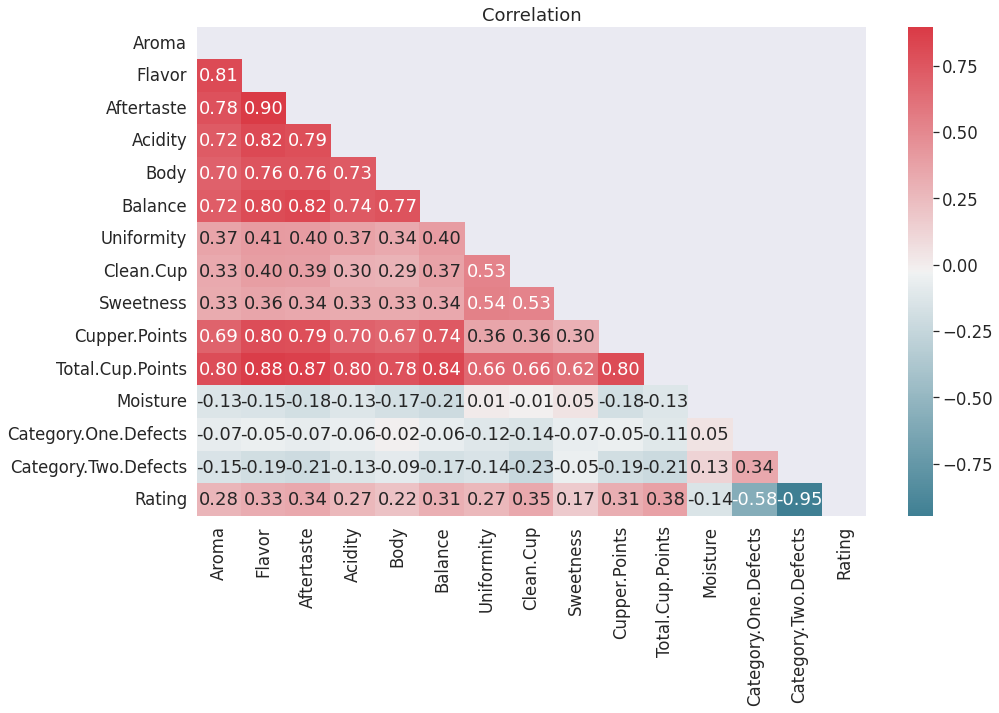

In [ ]:
plt.figure(figsize=(15,9))
plt.title('Correlation')
dropSelf = np.zeros_like(corr_mat)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt='.2f',mask=dropSelf)
sns.set(font_scale=1.5)

## Distribution Of Variables

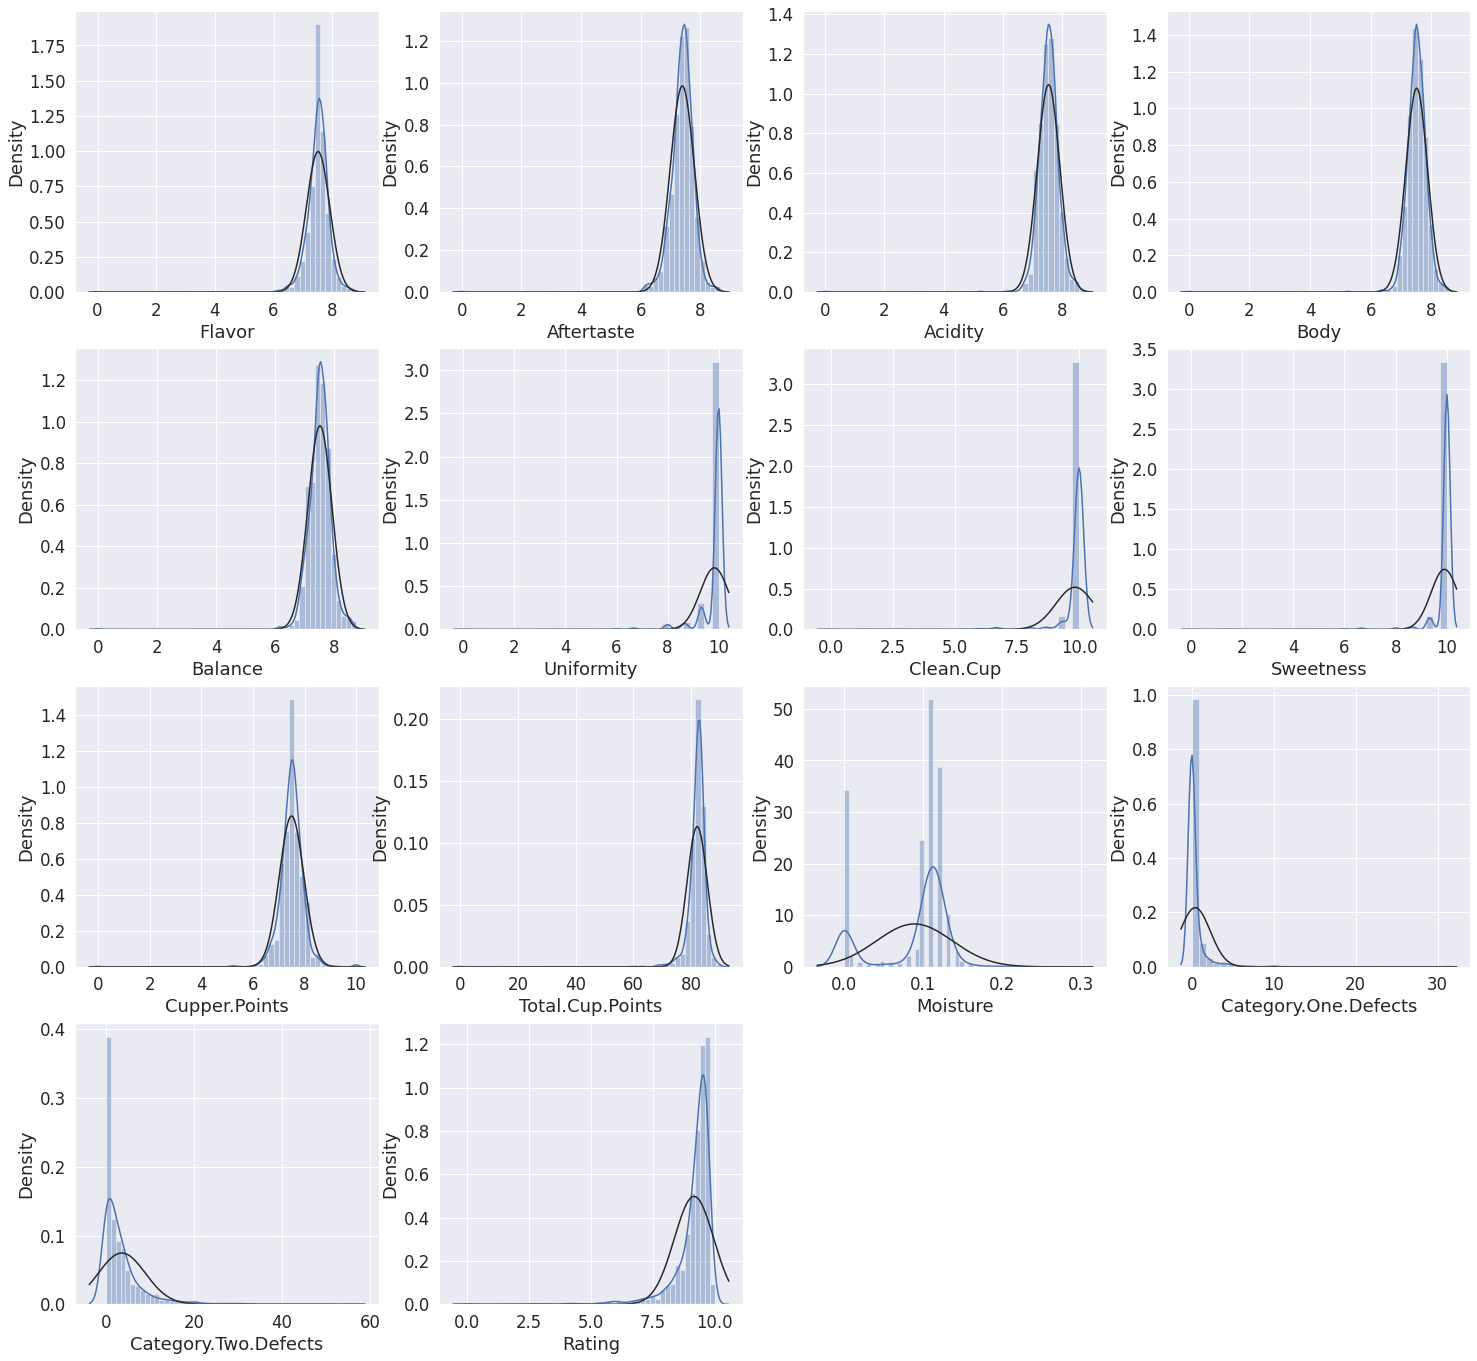

In [ ]:
plt.figure(figsize = (25,30))
for i in range(1,15):
  plt.subplot(5,4,i)
  sns.distplot(data[data.columns[i]],fit=norm)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X = data[data.columns[:-1]]
Y = data['Rating']

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=5)

In [ ]:
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = reg.predict(X_test)
Y_pred[:10]

array([6.07378049, 9.32560976, 9.75284553, 8.33069106, 8.71260163,
       9.5695122 , 9.67764228, 9.71158537, 9.51199187, 9.34634146])

In [ ]:
print('Accuracy : ',metrics.r2_score(Y_test,Y_pred))

Accuracy :  1.0


In [ ]:
import statsmodels.api as sm

In [ ]:
#OLS Model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_train = sm.add_constant(X_train) # adding a constant
x_test = sm.add_constant(X_test)
model = sm.OLS(Y_train, x_train).fit()
predictions = model.predict(x_test) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 6.315243902439025
Coefficients: 
 [ 0.0203252   0.0203252   0.0203252   0.0203252   0.0203252   0.0203252
  0.0203252   0.0203252   0.0203252   0.0203252   0.0203252   0.0203252
 -0.12195122 -0.12195122]
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.932e+26
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:27:47   Log-Likelihood:                 27197.
No. Observations:                 983   AIC:                        -5.436e+04
Df Residuals:                     968   BIC:                        -5.429e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                   

In [ ]:
# Prediciton using Gaussian Regression Model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, Y_train)
gaussian_process.kernel_

3.33**2 * RBF(length_scale=100)

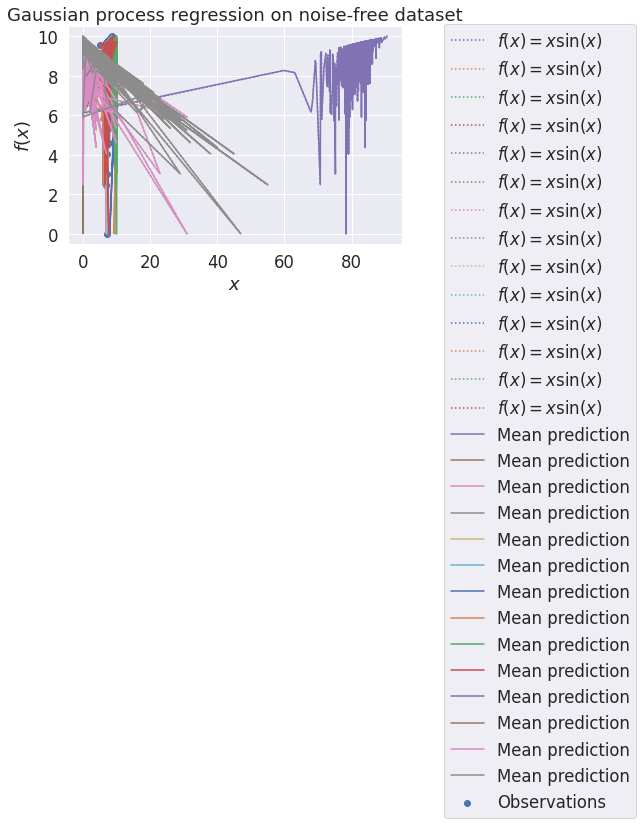

In [ ]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, Y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train.iloc[:, 0], Y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [ ]:
# Prediction using Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test) #Predictions on Testing data
print(DT_predict)

[9.30609909 9.30609909 9.6630888  8.10748645 8.73937669 9.6630888
 9.6630888  9.6630888  9.45369467 9.53780604 8.981905   8.12709059
 9.6630888  9.53780604 9.6630888  9.30609909 9.53780604 9.30609909
 9.45369467 8.981905   8.66587575 9.30609909 9.45369467 9.16739185
 9.53780604 9.30609909 0.         8.43297589 9.45369467 9.6630888
 9.45369467 9.30609909 9.30609909 9.53780604 9.6630888  9.53780604
 9.30609909 9.6630888  9.45369467 8.981905   9.53780604 9.6630888
 9.6630888  9.16739185 7.20182927 6.69241192 9.6630888  9.45369467
 9.45369467 9.16739185 9.6630888  9.53780604 9.53780604 9.45369467
 9.6630888  9.6630888  9.45369467 8.981905   9.30609909 9.30609909
 9.6630888  8.10748645 9.30609909 8.981905   9.16739185 7.67085874
 9.6630888  9.53780604 9.6630888  9.6630888  9.30609909 9.6630888
 9.6630888  9.53780604 9.53780604 9.45369467 9.30609909 7.89015679
 9.16739185 9.30609909 9.30609909 9.45369467 9.45369467 9.30609909
 9.45369467 9.53780604 5.76294038 9.6630888  9.16739185 8.43297589

In [ ]:
print("Accuracy : ",metrics.r2_score(Y_test,DT_predict))

Accuracy :  0.7509923577898329


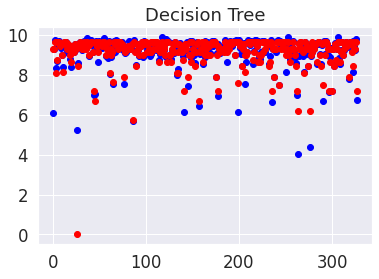

In [ ]:
if max(Y_test) >= max(DT_predict):
    my_range = int(max(Y_test))
else:
    my_range = int(max(DT_predict))
plt.scatter(range(len(Y_test)), Y_test, color='blue')
plt.scatter(range(len(DT_predict)), DT_predict, color='red')
plt.title("Decision Tree")
plt.show()

In [ ]:
# Prediction using KNN Model
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)
KNN_predict = KNN_model.predict(X_test) #Predictions on Testing data
print(KNN_predict)

[8.69905149 9.32920054 9.75345528 8.41233062 8.80311653 9.57079946
 9.67838753 9.70995935 9.51172087 9.4751355  9.00176152 8.62906504
 9.56192412 9.63333333 9.66436314 9.23685637 9.33536585 9.4399729
 9.33821138 8.8403794  8.51856369 9.45250678 9.44234417 9.14952575
 9.56714092 9.31795393 5.78367209 8.7451897  9.57594851 9.66673442
 9.48292683 9.20054201 9.45121951 9.34911924 9.68976965 9.63739837
 9.41944444 9.86253388 9.49342818 8.95074526 9.60616531 9.77073171
 9.52249322 9.16395664 7.12066396 7.26300813 9.69288618 9.35433604
 9.35948509 8.73855014 9.72554201 9.64200542 9.51422764 9.33509485
 9.57533875 9.86253388 9.49329268 8.97093496 9.4350271  8.96544715
 9.68976965 8.08726287 9.40697832 8.96781843 9.07025745 7.93922764
 9.70182927 9.23014905 9.73658537 9.6903794  9.30311653 9.68150407
 9.67289973 9.60697832 9.64017615 9.22398374 9.33028455 7.63075881
 9.09281843 9.22865854 9.26680217 9.43380759 9.71212737 9.30643631
 9.45901084 9.61415989 5.99810298 9.76185637 9.17974255 8.46436

In [ ]:
print("Accuracy : ",metrics.r2_score(Y_test,KNN_predict))

Accuracy :  0.9447626358018536


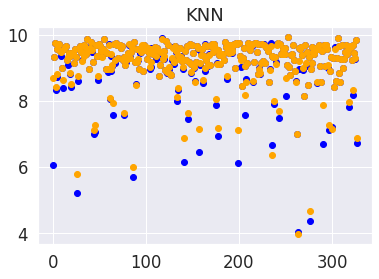

In [ ]:
if max(Y_test) >= max(KNN_predict):
    my_range = int(max(Y_test))
else:
    my_range = int(max(KNN_predict))
plt.scatter(range(len(Y_test)), Y_test, color='blue')
plt.scatter(range(len(KNN_predict)), KNN_predict, color='orange')
plt.title("KNN")
plt.show()